In [1]:
import os
import numpy as np
import pandas as pd
dataframe = pd.read_csv( '/home/yupaporn/codes/USAI/FVtrain_AN_RF_AN_fold8_3.csv') #เปลี่ยนไฟล์
dataframe = dataframe.drop(['Unnamed: 0'], axis=1)
dataframe

,0,1,2,3,4,5,6,7,8,9,...,2042,2043,2044,2045,2046,2047,Class,SubPosition,Views,Sub_class
0,-0.073532,-0.137312,0.282733,0.083720,-0.203224,-0.184130,0.162200,-0.194846,-0.158898,-0.074829,...,-0.207968,-0.038988,-0.015148,-0.075043,0.134039,-0.127550,Abnormal,P1,FP-A,AB01
1,-0.170323,-0.144238,0.234785,0.296260,-0.217903,-0.189379,0.163410,-0.234621,-0.220291,-0.019988,...,-0.183245,-0.161039,0.128365,0.296792,0.309504,-0.096808,Abnormal,P1,FP-A,AB02
2,-0.181449,-0.152859,-0.157695,0.033461,-0.200052,-0.151878,0.117279,-0.150576,-0.211502,-0.069214,...,-0.140477,-0.171491,-0.061372,0.148441,0.068689,-0.158158,Abnormal,P1,FP-A,AB03
3,-0.182013,-0.175779,0.170395,0.457328,-0.209899,-0.095732,1.000316,-0.232229,-0.212870,0.281321,...,-0.219182,0.773911,0.453935,0.538463,0.781271,-0.169567,Abnormal,P1,FP-A,AB04
4,-0.154250,-0.202830,-0.081837,-0.045834,-0.220811,-0.191688,0.034673,-0.193362,-0.203003,-0.121654,...,-0.222572,-0.011915,-0.128062,-0.084202,-0.144768,-0.156361,Abnormal,P1,FP-A,AB05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7363,0.843284,0.441933,-0.145207,0.115132,0.695095,1.011106,-0.145128,0.783063,0.800580,-0.215071,...,0.997947,-0.148869,0.133946,-0.123196,0.051774,0.582146,Normal,P8,FP-E,Normal
7364,0.628452,0.497133,0.008442,0.204830,0.782213,0.986520,-0.130831,0.840254,1.018736,-0.220214,...,0.487129,-0.186995,0.061770,-0.160484,0.098390,0.153022,Normal,P8,FP-E,Normal
7365,0.608563,0.309849,-0.061546,-0.053633,0.718535,1.010926,-0.078436,0.934963,0.677534,-0.210907,...,0.788859,-0.187995,0.173746,-0.127656,0.076143,0.375650,Normal,P8,FP-E,Normal
7366,0.021992,0.129988,-0.187011,-0.144503,0.134347,0.178286,-0.117127,0.238295,0.205396,-0.191095,...,0.086458,-0.142173,-0.167849,-0.165401,-0.107340,0.151485,Normal,P8,FP-E,Normal


In [2]:
X = dataframe.iloc[:,0:2048]
y = dataframe.iloc[:,2051]
print(X.shape)
print(y.shape)

(7368, 2048)
(7368,)


In [3]:
y[0]

'AB01'

# Random Forest

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

In [5]:
n_estimators = [400]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100] 

forest = RandomForestClassifier(random_state = 1)


hyperF ={'n_estimators' : n_estimators, 'max_depth' : max_depth, 'min_samples_split' : min_samples_split}
# hyperF ={'max_depth' : max_depth, 'min_samples_split' : min_samples_split}

gridF = GridSearchCV(forest, hyperF, cv = 10, verbose = 1, n_jobs = -1)
bestF = gridF.fit(X, y)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


In [6]:
# view the results as a pandas DataFrame
import pandas as pd
pd.DataFrame(bestF.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.777145,0.013886,"{'max_depth': 5, 'min_samples_split': 2, 'n_es..."
1,0.776874,0.015211,"{'max_depth': 5, 'min_samples_split': 5, 'n_es..."
2,0.776331,0.014434,"{'max_depth': 5, 'min_samples_split': 10, 'n_e..."
3,0.776059,0.013912,"{'max_depth': 5, 'min_samples_split': 15, 'n_e..."
4,0.772259,0.010932,"{'max_depth': 5, 'min_samples_split': 100, 'n_..."
5,0.890608,0.022106,"{'max_depth': 8, 'min_samples_split': 2, 'n_es..."
6,0.888165,0.017198,"{'max_depth': 8, 'min_samples_split': 5, 'n_es..."
7,0.888028,0.021671,"{'max_depth': 8, 'min_samples_split': 10, 'n_e..."
8,0.882193,0.017722,"{'max_depth': 8, 'min_samples_split': 15, 'n_e..."
9,0.838489,0.018394,"{'max_depth': 8, 'min_samples_split': 100, 'n_..."


In [7]:
# examine the first result
print("**examine the first result","\n")

print(bestF.cv_results_['params'][0])
print(bestF.cv_results_['mean_test_score'][0])

# print the array of mean scores only
print("\n","**print the array of mean scores only","\n")

grid_mean_scores = bestF.cv_results_['mean_test_score']
print(grid_mean_scores)

# examine the best model
print("\n","**examine the best model","\n")

print(bestF.best_score_)
print(bestF.best_params_)
print(bestF.best_estimator_)

**examine the first result 

{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 400}
0.7771453380331544

 **print the array of mean scores only 

[0.77714534 0.7768736  0.77633086 0.77605893 0.77225938 0.89060804
 0.88816497 0.88802762 0.88219298 0.8384887  0.9268476  0.92766208
 0.92739145 0.92603386 0.8589803  0.92711934 0.9253547  0.92630505
 0.92657605 0.86074568 0.92793346 0.92630468 0.92644055 0.92698347
 0.86088136]

 **examine the best model 

0.9279334552533773
{'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 400}
RandomForestClassifier(max_depth=30, n_estimators=400, random_state=1)


In [8]:
#Print the tured parameters and score
print("Tuned Decision Tree Parameters: {}".format(bestF.best_params_))
print("Best score is {}".format(bestF.best_score_))

Tuned Decision Tree Parameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 400}
Best score is 0.9279334552533773


# setting parameters

In [9]:
forestOpt = RandomForestClassifier(random_state = 1, max_depth = 30, n_estimators = 400, min_samples_split = 2) #เปลี่ยนตาม cell 8
             
modelOpt = forestOpt.fit(X, y)# 

In [10]:
dataframe = pd.read_csv( '/home/yupaporn/codes/USAI/FVvalidation_AN_RF_AN_fold8_3.csv') #เปลี่ยนชื่อไฟล์ Validation

In [11]:
dataframe

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,2042,2043,2044,2045,2046,2047,Class,SubPosition,Views,Sub_class
0,0,-0.155984,-0.161607,0.141449,0.187577,-0.134589,-0.141667,0.166550,-0.177672,-0.220467,...,-0.213020,-0.190236,0.265597,0.118994,0.059871,-0.098398,Abnormal,P1,FP-A,AB01
1,1,-0.148687,-0.172450,0.006868,0.232106,-0.238661,-0.196763,-0.007870,-0.250089,-0.218127,...,-0.222324,0.007600,0.266100,0.225148,0.066045,-0.162973,Abnormal,P1,FP-A,AB03
2,2,-0.112576,0.057718,-0.111039,-0.097577,-0.072925,-0.162434,0.228451,-0.215558,-0.101421,...,-0.091239,-0.130222,0.014257,0.059204,0.181619,-0.104105,Abnormal,P1,FP-A,AB04
3,3,-0.155079,-0.179761,0.059030,0.161366,0.015880,-0.190632,0.117847,-0.186183,-0.184482,...,-0.068063,0.220732,-0.112267,-0.013764,-0.044415,-0.183398,Abnormal,P1,FP-A,AB05
4,4,-0.172869,-0.138370,0.067479,0.498978,-0.101842,-0.133188,0.988235,-0.152898,-0.176786,...,-0.192208,0.237822,0.176370,0.174425,0.156044,-0.163919,Abnormal,P1,FP-A,AB06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,1051,0.654426,0.165883,-0.114791,0.006441,0.688616,0.644109,-0.053578,0.647476,0.847357,...,0.610763,-0.146984,-0.101852,-0.169434,-0.035481,0.412734,Normal,P8,FP-E,Normal
1052,1052,0.661581,0.526834,-0.018332,0.111603,0.869040,1.473895,-0.136012,0.950485,1.150270,...,0.755904,-0.167638,0.024032,-0.108081,0.188144,0.300245,Normal,P8,FP-E,Normal
1053,1053,0.654426,0.165883,-0.114791,0.006441,0.688616,0.644109,-0.053578,0.647476,0.847357,...,0.610763,-0.146984,-0.101852,-0.169434,-0.035481,0.412734,Normal,P8,FP-E,Normal
1054,1054,0.805190,0.182577,-0.024150,0.026605,0.881689,0.833209,-0.115978,0.914275,0.640903,...,0.655439,-0.120009,0.303386,-0.136629,0.011057,0.192910,Normal,P8,FP-E,Normal


In [12]:
X_test = dataframe.iloc[:,1:2049]
y_test = dataframe.iloc[:,2052]
print(X_test.shape)
print(y_test.shape)

(1056, 2048)
(1056,)


In [13]:
y_test

0         AB01
1         AB03
2         AB04
3         AB05
4         AB06
         ...  
1051    Normal
1052    Normal
1053    Normal
1054    Normal
1055    Normal
Name: Sub_class, Length: 1056, dtype: object

In [14]:
y_pred = modelOpt.predict(X_test)

In [15]:
#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))#performance

[[ 52  16   0   0   0   0   0   0   0   0   0   0   0   0  14]
 [ 13  28   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2  12   3   0   0   0   0   0   0   0   0   0   0   0   2]
 [  1   0   0  22   0   0   0   6   0   0   0   0   0   7   1]
 [  0   0   0   1   6   1   0   1   0   0   0   0   0   1   5]
 [  0   0   0   0   0   1   5   0   0   0   0   0   0   0   9]
 [  0   0   0   5   2   2   5   0   0   0   0   0   0   0   8]
 [  0   0   0   7   0   0   0   3   2   0   0   0   0   6   6]
 [  1   0   0  15   0   2   0   0   9   0   0   0   0  18  18]
 [  2   0   0   5   0   0   0   7   0   0   0   0   0   1   2]
 [  3   0   0   3   0   0   0   0   0   0  13   0   0   2  10]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0   4   9]
 [  0   0   0   9   0   0   0   2   2   0   2   0   1   9   9]
 [  6   0   0   0   0   0   0   6   0   0   0   0   0  51   7]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 572]]
              precision    recall  f1-score   support


/home/kannika/miniconda3/envs/AI/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kannika/miniconda3/envs/AI/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kannika/miniconda3/envs/AI/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 21.5, 'Predicted label')

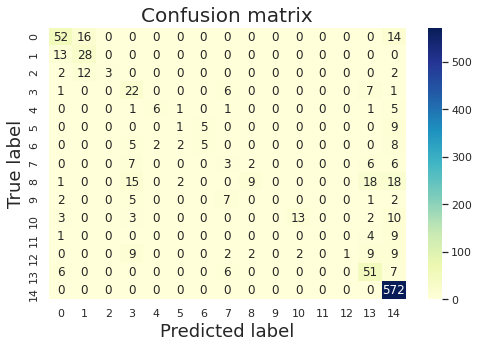

In [16]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

# Save Model

In [17]:
#Save Model

import pickle
os.chdir('/media/tohn/SSD/ModelTrainByImages/R2_8/models/')
filename = "modelrf_AN_15AB_fold8_3.pkl" #เปลี่ยนชื่อไฟล์ Train random forest
with open(filename, 'wb') as file:
    pickle.dump(modelOpt, file)

In [ ]:
# #load model

# with open(filename, 'rb') as file:
#     model = pickle.load(file)